In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_enem = pd.read_parquet ('C:/Users/lucas.stein/Downloads/enem_2019.parquet')

In [4]:
df_enem.shape

(5095270, 136)

In [5]:
df_enem.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
0  190001595656    2019                  3552205                Sorocaba   
1  190001421546    2019                  2910800        Feira de Santana   
2  190001133210    2019                  2304400               Fortaleza   
3  190001199383    2019                  1721000                  Palmas   
4  190001237802    2019                  3118601                Contagem   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                35               SP      36.0       M                1   
1                29               BA      23.0       M                1   
2                23               CE      39.0       F                1   
3                17               TO      25.0       F                1   
4                31               MG      22.0       F                1   

   TP_COR_RACA  TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO  \
0            3                 1                2914802.0   
1            1                 1                2910800.0   
2            3                 1                2304400.0   
3            1                 1                1721000.0   
4            1                 1                3118601.0   

  NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  \
0                 Itabuna              29.0               BA                1   
1        Feira de Santana              29.0               BA                1   
2               Fortaleza              23.0               CE                1   
3                  Palmas              17.0               TO                1   
4                Contagem              31.0               MG                1   

   TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_ESCOLA  \
0               11          1        NaN             0        NaN   
1                5          1        1.0             0        NaN   
2               13          1        1.0             0        NaN   
3                4          1        NaN             0        NaN   
4                4          1        1.0             0        NaN   

   CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  \
0               NaN             None        NaN      None   
1               NaN             None        NaN      None   
2               NaN             None        NaN      None   
3               NaN             None        NaN      None   
4               NaN             None        NaN      None   

   TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0                     NaN                 NaN              NaN   
1                     NaN                 NaN              NaN   
2                     NaN                 NaN              NaN   
3                     NaN                 NaN              NaN   
4                     NaN                 NaN              NaN   

   IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  \
0               0            0          0                        0   
1               0            0          0                        0   
2               0            0          0                        0   
3               0            0          0                        0   
4               0            0          0                        0   

   IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  \
0                  0                      0                      0   
1                  0                      0                      0   
2                  0                      0                      0   
3                  0                      0                      0   
4                  0                      0                      0   

   IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  \
0                   0            0               0           0   
1                   0            0               0           0   
2                   0 

In [6]:
df_enem.dtypes

NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC   

In [7]:
colunas_questoes = [coluna for coluna in df_enem.columns if 'TX' in coluna]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [8]:
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO')]
colunas_codigos

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [9]:
colunas_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
colunas_municipios

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [10]:
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipios + ['NU_INSCRICAO','NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1)
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               SP      36.0       M                1            3   
1               BA      23.0       M                1            1   
2               CE      39.0       F                1            3   
3               TO      25.0       F                1            1   
4               MG      22.0       F                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               BA                1               11   
1                 1               BA                1                5   
2                 1               CE                1               13   
3                 1               TO                1                4   
4                 1               MG                1                4   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1        NaN             0      None                     NaN   
1          1        1.0             0      None                     NaN   
2          1        1.0             0      None                     NaN   
3          1        NaN             0      None                     NaN   
4          1        1.0             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

In [11]:
df_enem.shape

(5095270, 109)

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
df_enem.describe()

NU_IDADE  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
count 5095201.00       5095270.00   5095270.00        5095270.00   
mean       22.09             1.08         2.13              1.03   
std         7.45             0.44         1.02              0.21   
min        10.00             0.00         0.00              0.00   
25%        18.00             1.00         1.00              1.00   
50%        19.00             1.00         2.00              1.00   
75%        24.00             1.00         3.00              1.00   
max        94.00             4.00         5.00              4.00   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
count       5095270.00       5095270.00 5095270.00 2878197.00    5095270.00   
mean              1.54             2.96       1.33       1.00          0.12   
std               0.72             4.11       0.55       0.07          0.33   
min               1.00             0.00       1.00       1.00          0.00   
25%               1.00             0.00       1.00       1.00          0.00   
50%               1.00             1.00       1.00       1.00          0.00   
75%               2.00             4.00       2.00       1.00          0.00   
max               4.00            13.00       3.00       2.00          1.00   

       TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
count              1147412.00          1147412.00       1147412.00   
mean                     2.25                1.04             1.01   
std                      0.75                0.19             0.12   
min                      1.00                1.00             1.00   
25%                      2.00                1.00             1.00   
50%                      2.00                1.00             1.00   
75%                      2.00                1.00             1.00   
max                      4.00                2.00             4.00   

       IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  \
count      5095270.00   5095270.00 5095270.00               5095270.00   
mean             0.00         0.00       0.00                     0.00   
std              0.03         0.01       0.02                     0.02   
min              0.00         0.00       0.00                     0.00   
25%              0.00         0.00       0.00                     0.00   
50%              0.00         0.00       0.00                     0.00   
75%              0.00         0.00       0.00                     0.00   
max              1.00         1.00       1.00                     1.00   

       IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  \
count         5095270.00             5095270.00             5095270.00   
mean                0.00                   0.00                   0.00   
std                 0.00                   0.04                   0.02   
min                 0.00                   0.00                   0.00   
25%                 0.00                   0.00                   0.00   
50%                 0.00                   0.00                   0.00   
75%                 0.00                   0.00                   0.00   
max                 1.00                   1.00                   1.00   

       IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  \
count          5095270.00   5095270.00      5095270.00  5095270.00   
mean                 0.00         0.00            0.00        0.00   
std                  0.04         0.02            0.01        0.02   
min                  0.00         0.00            0.00        0.00   
25%                  0.00         0.00            0.00        0.00   
50%                  0.00         0.00            0.00        0.00   
75%                  0.00         0.00            0.00        0.00   
max                  1.00         1.00            1.00        1.00   

       IN_VISAO_MONOCULAR  IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE   IN_IDOSO  \
count  

In [14]:
colunas_notas = [coluna for coluna in df_enem.columns if 'NOTA' in coluna]
colunas_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [15]:
colunas_notas = [coluna for coluna in colunas_notas if 'COMP' not in coluna]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [16]:
df_enem.reset_index(drop=True)
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               SP     36.00       M                1            3   
1               BA     23.00       M                1            1   
2               CE     39.00       F                1            3   
3               TO     25.00       F                1            1   
4               MG     22.00       F                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               BA                1               11   
1                 1               BA                1                5   
2                 1               CE                1               13   
3                 1               TO                1                4   
4                 1               MG                1                4   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1        NaN             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1       1.00             0      None                     NaN   
3          1        NaN             0      None                     NaN   
4          1       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

In [17]:
df_enem['NU_IDADE'].value_counts().sort_index()

NU_IDADE
10.00         6
11.00         9
12.00        46
13.00       266
14.00      5267
15.00     78563
16.00    316437
17.00    847303
18.00    864186
19.00    577161
20.00    409385
21.00    290311
22.00    233036
23.00    187681
24.00    156262
25.00    128042
26.00    106880
27.00     89618
28.00     78008
29.00     66783
30.00     62491
31.00     56633
32.00     50252
33.00     46774
34.00     42821
35.00     38584
36.00     36476
37.00     35197
38.00     32656
39.00     28629
40.00     25991
41.00     22675
42.00     20411
43.00     18551
44.00     16508
45.00     15183
46.00     13509
47.00     12565
48.00     11107
49.00      9950
50.00      8799
51.00      7698
52.00      6981
53.00      6200
54.00      5527
55.00      4781
56.00      4058
57.00      3624
58.00      2774
59.00      2386
60.00      1901
61.00      1602
62.00      1384
63.00      1075
64.00       849
65.00       713
66.00       531
67.00       495
68.00       366
69.00       306
70.00       221
71.00       174

<Axes: xlabel='NU_IDADE', ylabel='Density'>

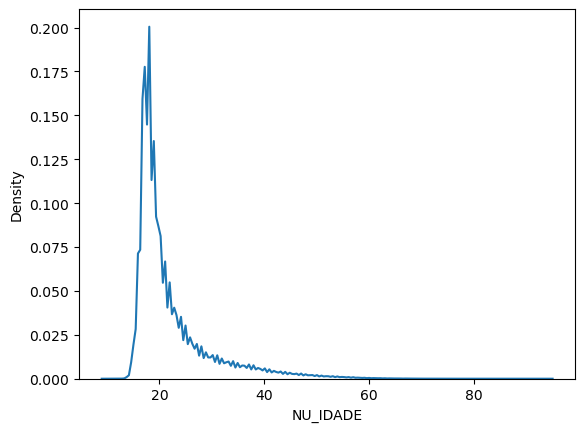

In [18]:
sns.kdeplot(df_enem, x='NU_IDADE')

<Axes: xlabel='NU_IDADE', ylabel='Count'>

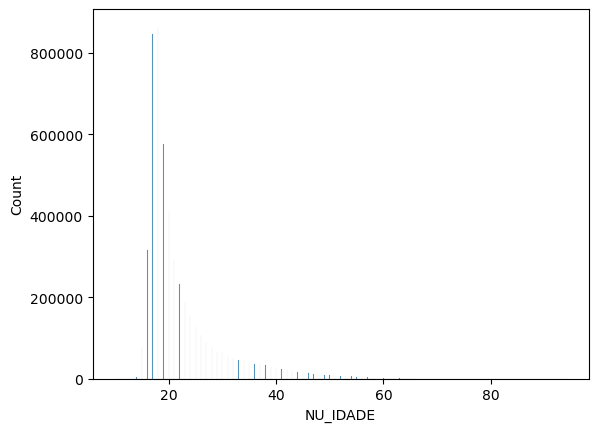

In [19]:
sns.histplot(data=df_enem, x='NU_IDADE')

<Axes: ylabel='NU_IDADE'>

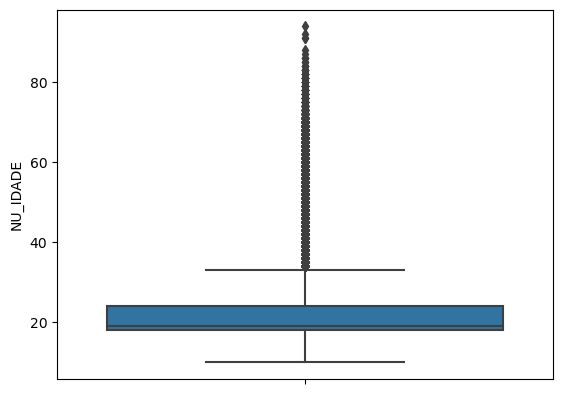

In [20]:
sns.boxplot(data=df_enem, y='NU_IDADE')

In [21]:
df_enem['TP_SEXO'].value_counts()

TP_SEXO
F    3031822
M    2063448
Name: count, dtype: int64

<Axes: xlabel='TP_SEXO', ylabel='count'>

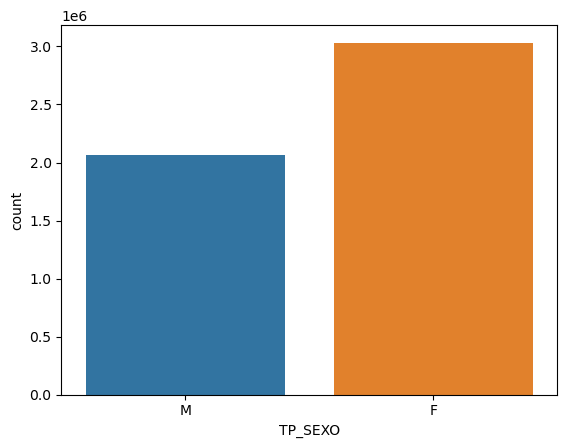

In [22]:
sns.countplot(data=df_enem, x='TP_SEXO')

In [23]:
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

TP_ESTADO_CIVIL
0     206800
1    4398485
2     395855
3      87894
4       6236
Name: count, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

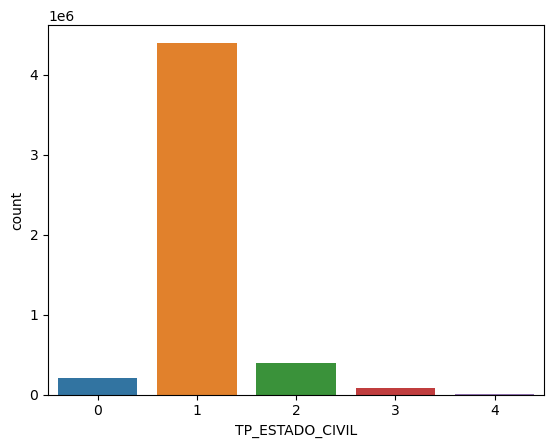

In [24]:
sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL')

In [25]:
df_enem['TP_COR_RACA'].value_counts().sort_index()

TP_COR_RACA
0     103201
1    1831779
2     648309
3    2364063
4     116162
5      31756
Name: count, dtype: int64

In [26]:
'''
0	 Não declarado
1	 Branca
2	 Preta
3	 Parda
4	 Amarela
5	 Indígena 
'''

'\n0\t Não declarado\n1\t Branca\n2\t Preta\n3\t Parda\n4\t Amarela\n5\t Indígena \n'

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

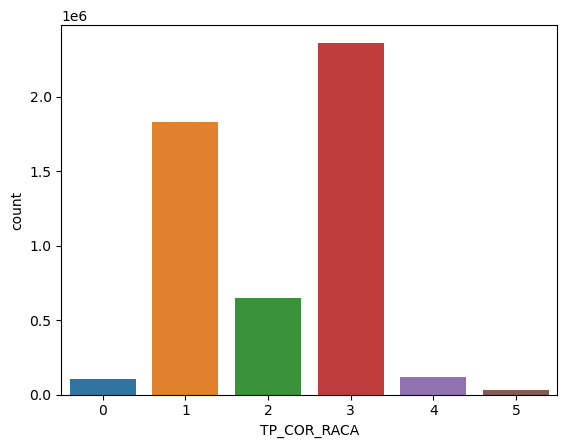

In [27]:
sns.countplot(data=df_enem, x='TP_COR_RACA')

In [28]:
ufs = df_enem['SG_UF_RESIDENCIA'].value_counts()
ufs

SG_UF_RESIDENCIA
SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: count, dtype: int64

<Axes: xlabel='SG_UF_RESIDENCIA', ylabel='count'>

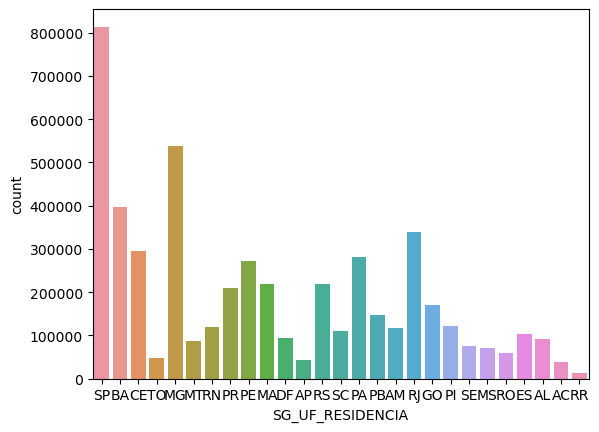

In [29]:
sns.countplot(data=df_enem, x='SG_UF_RESIDENCIA')

In [30]:
df_ufs = pd.DataFrame({'uf': ufs.index, 'candidatos': ufs.values})
df_ufs.head()

uf  candidatos
0  SP      813772
1  MG      538896
2  BA      398095
3  RJ      338710
4  CE      295870

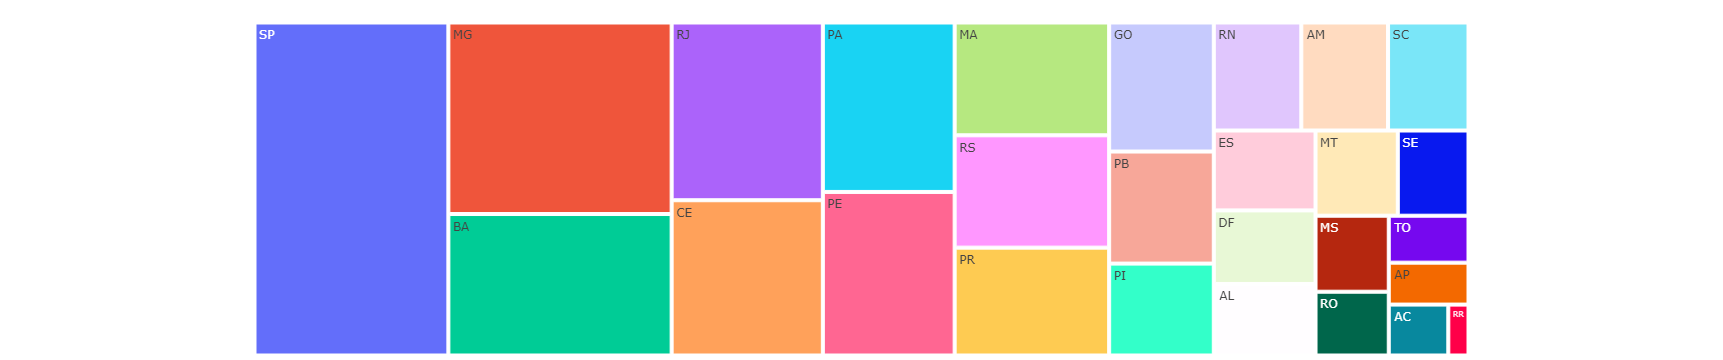

In [31]:
import plotly.express as px

fig = px.treemap(data_frame=df_ufs, path=['uf'], values='candidatos')
fig.update_layout(margin = dict(t=0, r=250, l=250, b=0))
fig.show()

In [32]:
df_enem['Q001'].value_counts().sort_index()

Q001
A     290615
B    1135816
C     723518
D     586620
E    1308991
F     375721
G     229183
H     444806
Name: count, dtype: int64

In [33]:
df_enem['Q002'].value_counts().sort_index()

Q002
A     194625
B     854826
C     686198
D     667415
E    1633692
F     513711
G     399470
H     145333
Name: count, dtype: int64

In [34]:
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])

In [35]:
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               SP     36.00       M                1            3   
1               BA     23.00       M                1            1   
2               CE     39.00       F                1            3   
3               TO     25.00       F                1            1   
4               MG     22.00       F                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               BA                1               11   
1                 1               BA                1                5   
2                 1               CE                1               13   
3                 1               TO                1                4   
4                 1               MG                1                4   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1        NaN             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1       1.00             0      None                     NaN   
3          1        NaN             0      None                     NaN   
4          1       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

In [36]:
df_enem['pai_possui_superior'].value_counts(normalize=True) * 100

pai_possui_superior
False   88.13
True    11.87
Name: proportion, dtype: float64

<Axes: xlabel='pai_possui_superior', ylabel='count'>

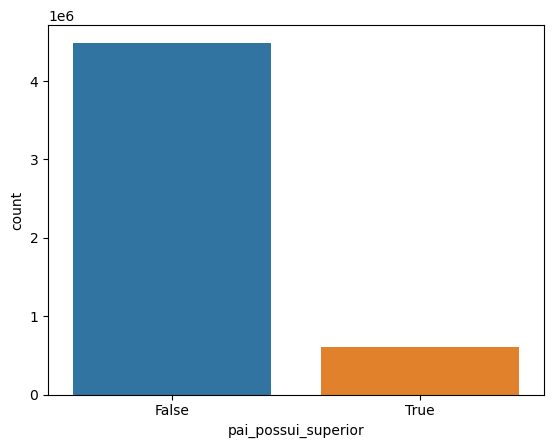

In [37]:
sns.countplot(data=df_enem, x='pai_possui_superior')

In [38]:
df_enem['mae_possui_superior'].value_counts(normalize=True) * 100

mae_possui_superior
False   82.08
True    17.92
Name: proportion, dtype: float64

<Axes: xlabel='mae_possui_superior', ylabel='count'>

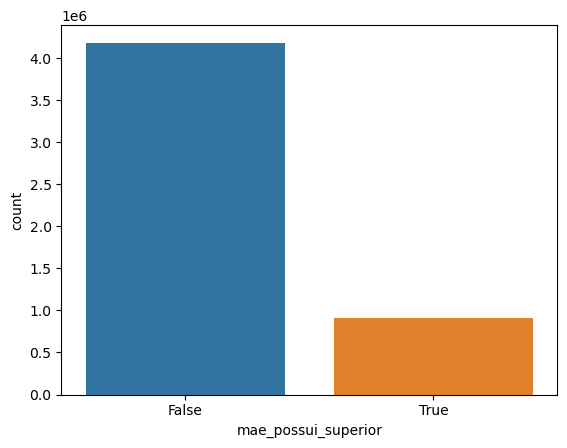

In [39]:
sns.countplot(data=df_enem, x='mae_possui_superior')

In [40]:
df_enem['Q006'].value_counts(normalize=True) * 100

Q006
C   25.74
B   24.99
D    9.81
E    9.33
G    5.93
A    4.55
F    4.44
H    3.79
I    2.82
J    1.59
N    1.21
K    1.14
Q    1.12
O    0.99
L    0.87
M    0.85
P    0.85
Name: proportion, dtype: float64

<Axes: xlabel='Q006', ylabel='count'>

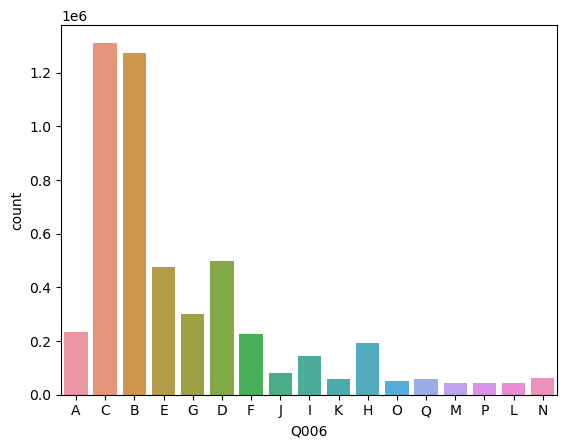

In [41]:
sns.countplot(data=df_enem, x= 'Q006')

In [42]:
df_sexo = df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
0         NaN         NaN         NaN         NaN              NaN       M
1         NaN         NaN         NaN         NaN              NaN       M
2         NaN         NaN         NaN         NaN              NaN       F
3      483.80      503.60      537.30      392.00           460.00       F
4      513.60      575.50      570.70      677.00           860.00       F

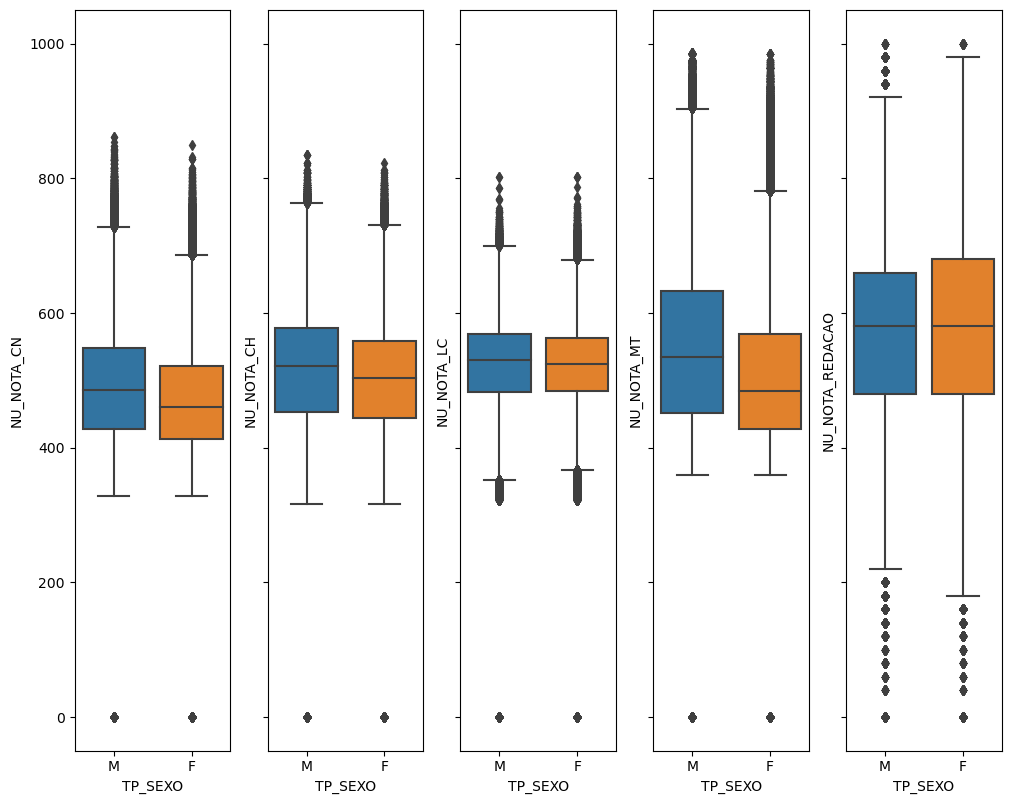

In [43]:
figuras, graficos = plt.subplots(1, 5, sharey=True, figsize=(10,8))
plt.tight_layout()

for i in range(5):
    coluna_1=colunas_notas[i]

    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i])

In [44]:
df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         NaN         NaN         NaN         NaN              NaN   
3      483.80      503.60      537.30      392.00           460.00   
4      513.60      575.50      570.70      677.00           860.00   

   TP_COR_RACA  
0            3  
1            1  
2            3  
3            1  
4            1

In [45]:
df_enem['TP_COR_RACA'].value_counts(normalize=True) * 100

TP_COR_RACA
3   46.40
1   35.95
2   12.72
4    2.28
0    2.03
5    0.62
Name: proportion, dtype: float64

In [46]:
'''
0	 Não declarado
1	 Branca
2	 Preta
3	 Parda
4	 Amarela
5	 Indígena 
'''

'\n0\t Não declarado\n1\t Branca\n2\t Preta\n3\t Parda\n4\t Amarela\n5\t Indígena \n'

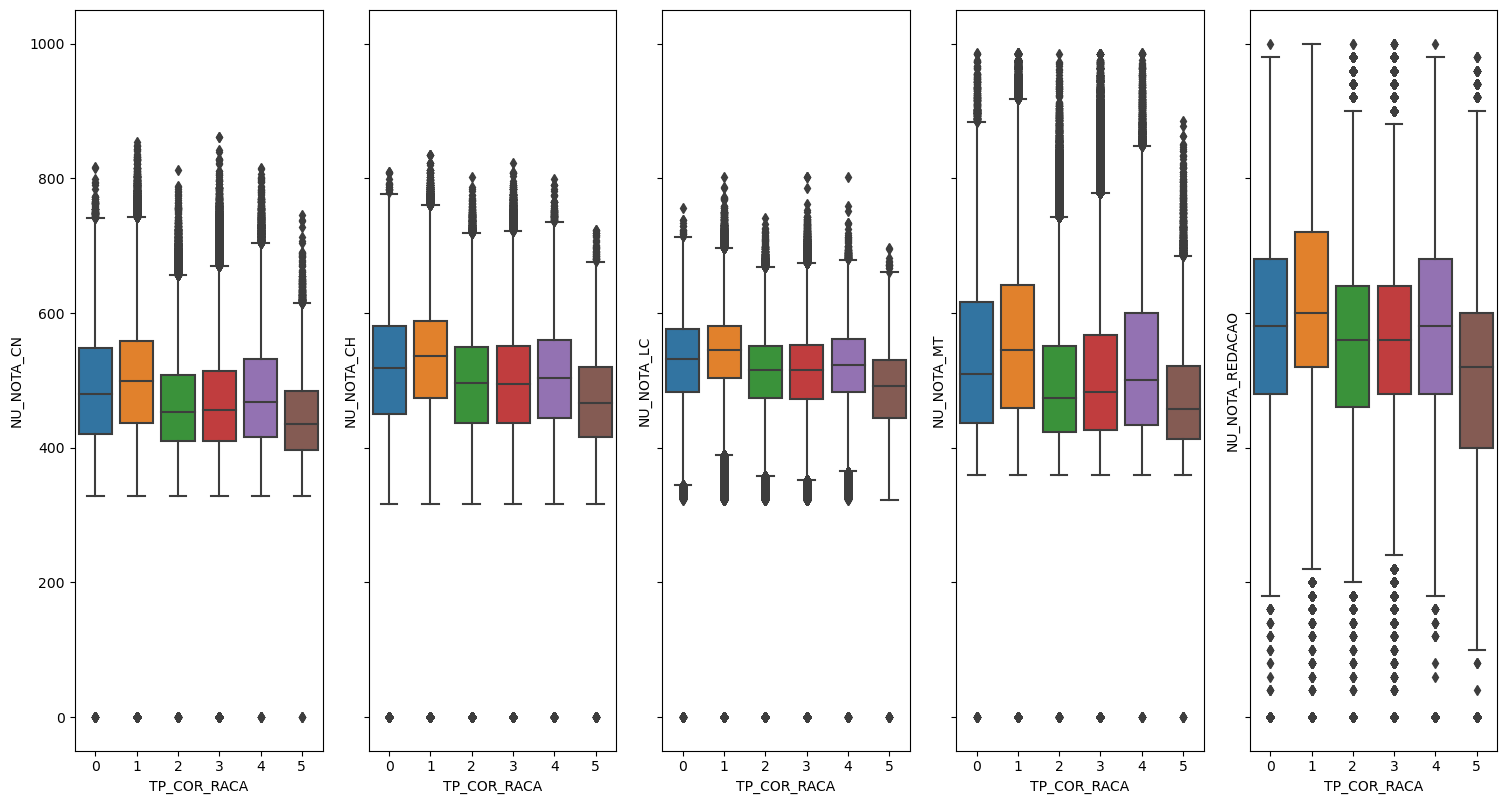

In [47]:
figuras, graficos = plt.subplots(1, 5, sharey=True, figsize=(15, 8))
plt.tight_layout()

for i in range(5):
    coluna_1=colunas_notas[i]

    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i])

In [48]:
df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_instrucao_pais.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         NaN         NaN         NaN         NaN              NaN   
3      483.80      503.60      537.30      392.00           460.00   
4      513.60      575.50      570.70      677.00           860.00   

   pai_possui_superior  mae_possui_superior  
0                False                False  
1                False                False  
2                False                False  
3                False                False  
4                False                False

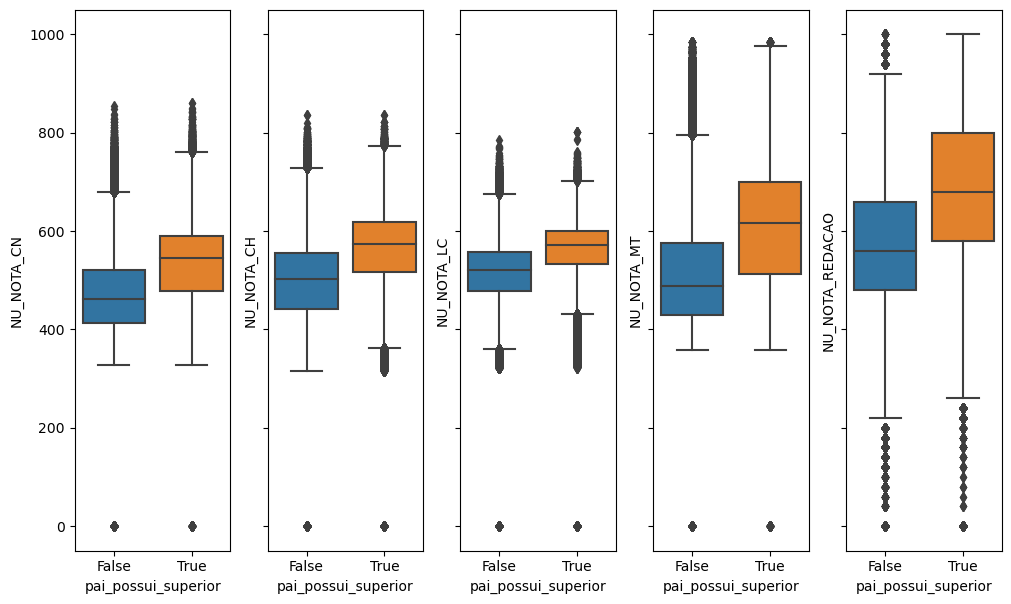

In [49]:
figuras, graficos = plt.subplots(1, 5, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(5):
    coluna_1=colunas_notas[i]
    
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

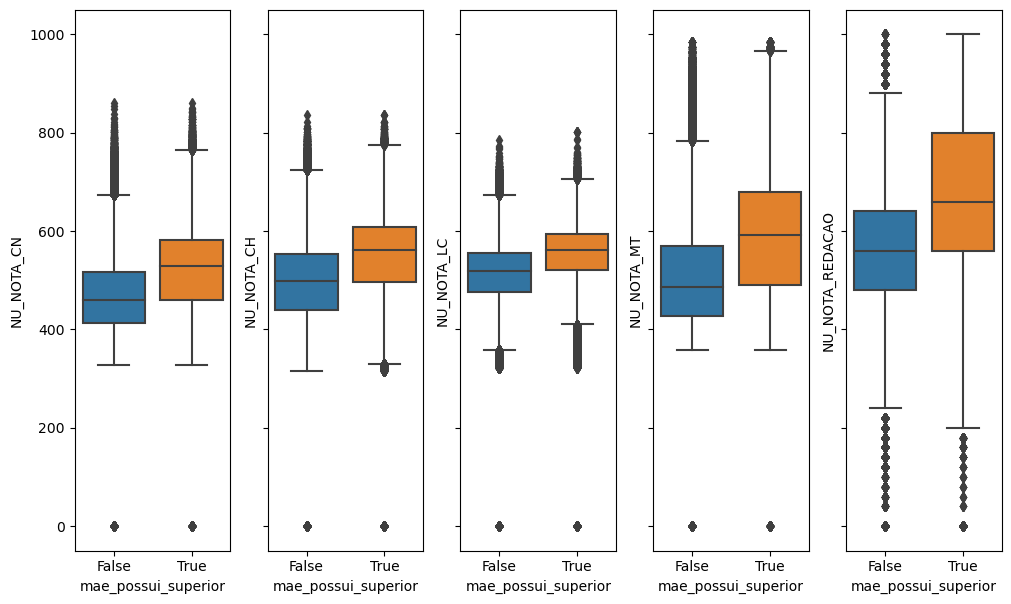

In [50]:
figuras, graficos = plt.subplots(1, 5, sharey=True, figsize=(10, 6))
plt.tight_layout()

for i in range(5):
    coluna_1=colunas_notas[i]
    
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

In [51]:
df_idade = df_enem.loc[:, colunas_notas + ['NU_IDADE']]
df_idade.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  NU_IDADE
0         NaN         NaN         NaN         NaN              NaN     36.00
1         NaN         NaN         NaN         NaN              NaN     23.00
2         NaN         NaN         NaN         NaN              NaN     39.00
3      483.80      503.60      537.30      392.00           460.00     25.00
4      513.60      575.50      570.70      677.00           860.00     22.00

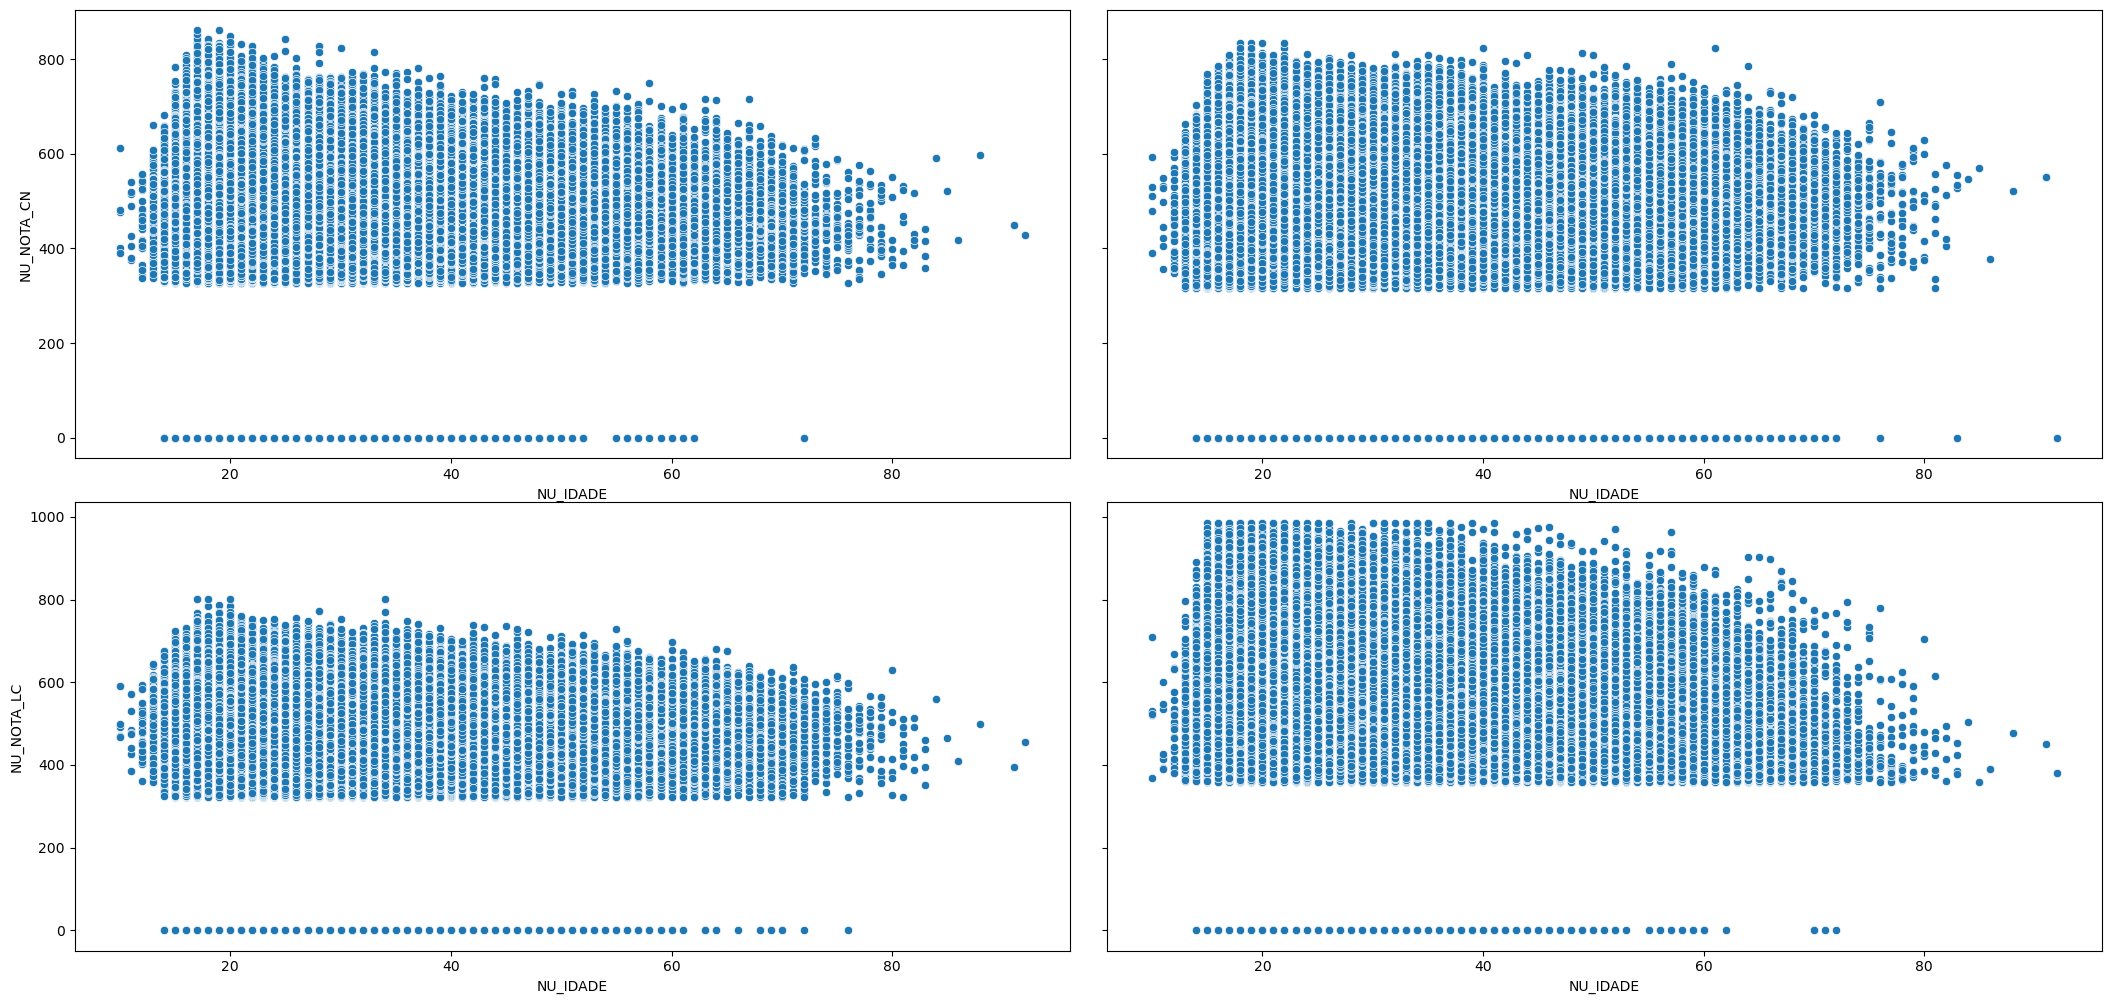

In [75]:
figuras, graficos = plt.subplots(2, 2, sharey='row', figsize=(21, 10))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    
    linha = i // 2
    coluna = i % 2
    
    sns.scatterplot(data=df_idade, y=coluna_1, x='NU_IDADE', ax=graficos[linha, coluna])

In [74]:
df_idade.describe()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
count  3710433.00  3923145.00  3923145.00  3710433.00       3923144.00   
mean       477.82      507.25      520.52      523.12           571.19   
std         76.10       82.41       64.15      109.06           188.76   
min          0.00        0.00        0.00        0.00             0.00   
25%        417.80      447.90      483.50      435.10           480.00   
50%        470.30      510.60      526.20      501.10           580.00   
75%        533.20      566.60      565.30      597.80           680.00   
max        860.90      835.10      801.70      985.50          1000.00   

        NU_IDADE  
count 5095201.00  
mean       22.09  
std         7.45  
min        10.00  
25%        18.00  
50%        19.00  
75%        24.00  
max        94.00